In [1]:
import sys  
sys.path.insert(0, '..')
sys.path.insert(0, '../src')
%cd ../src

/Users/vornao/Desktop/unipi/ML/code/first_nn/src


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import colors


from src.utils import SingleClassError, MultiClassError, one_hot_encoder
import src.network as network
from src.activation_functions import Sigmoid, ReLU


from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    multilabel_confusion_matrix,
)


mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["figure.figsize"] = 10, 5


In [3]:
import importlib
importlib.reload(network)

<module 'src.network' from '/Users/vornao/Desktop/unipi/ML/code/first_nn/src/../src/network.py'>

In [4]:
monk1_train = pd.read_csv('../data/monk/monks-1.train', sep=' ')
monk1_test = pd.read_csv('../data/monk/monks-1.train', sep=' ')

monk1_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 124 entries, nan to nan
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a1      124 non-null    int64 
 1   a2      124 non-null    int64 
 2   a3      124 non-null    int64 
 3   a4      124 non-null    int64 
 4   a5      124 non-null    int64 
 5   a6      124 non-null    int64 
 6   a7      124 non-null    int64 
 7   a8      124 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.7+ KB


In [5]:
x_train = monk1_train[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']].to_numpy()
y_train = monk1_train['a1'].to_numpy()

x_train, x_val = x_train[:100], x_train[100:]
y_train, y_val = y_train[:100], y_train[100:]

x_test = monk1_test[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']].to_numpy()
y_test = monk1_test['a1'].to_numpy()

In [8]:
net = network.Network(7)
net.add_layer(3, ReLU(), bias=1)
net.add_output_layer(1, Sigmoid(1)) 

stats = net.train(
    x_train, y_train, x_val, y_val, 
    estimator=SingleClassError(),
    eta=10e-2,
    epochs=500,
    verbose=False
)


Epoch : 500 -  Training Loss: 0.0 - Validaition Loss 0.0
------------------------------------------------------------


> Model accuracy: 100.0%. ROC AUC Score: 1.0


<AxesSubplot:>

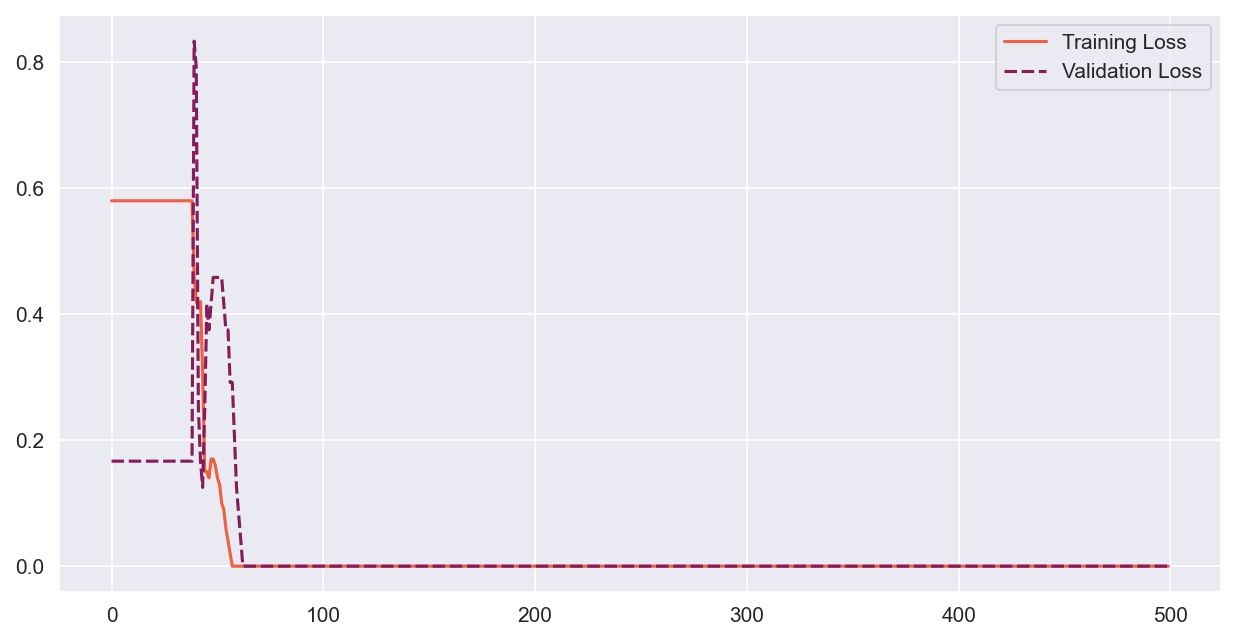

In [9]:
predictions = []

for p in x_test:
    predictions.append(round(net.output(p)[0]))

predictions = np.array(predictions) 

accuracy = round(accuracy_score(y_test, predictions), 2)*100
roc = round(roc_auc_score(y_test, predictions), 2)
fpr, tpr, _ = roc_curve(y_test, predictions)
print(f'> Model accuracy: {accuracy}%. ROC AUC Score: {roc}')

losses = pd.DataFrame({'Training Loss':stats[0], 'Validation Loss':stats[1]})

palette = sns.color_palette("rocket_r", 2)
sns.set_style("darkgrid")
sns.lineplot(losses, palette=palette)